In [0]:
import pandas as pd
import io
data = pd.read_csv('tedsd_data_2017.csv')# Dataset is now stored in a Pandas Dataframe

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import missingno as msno 
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

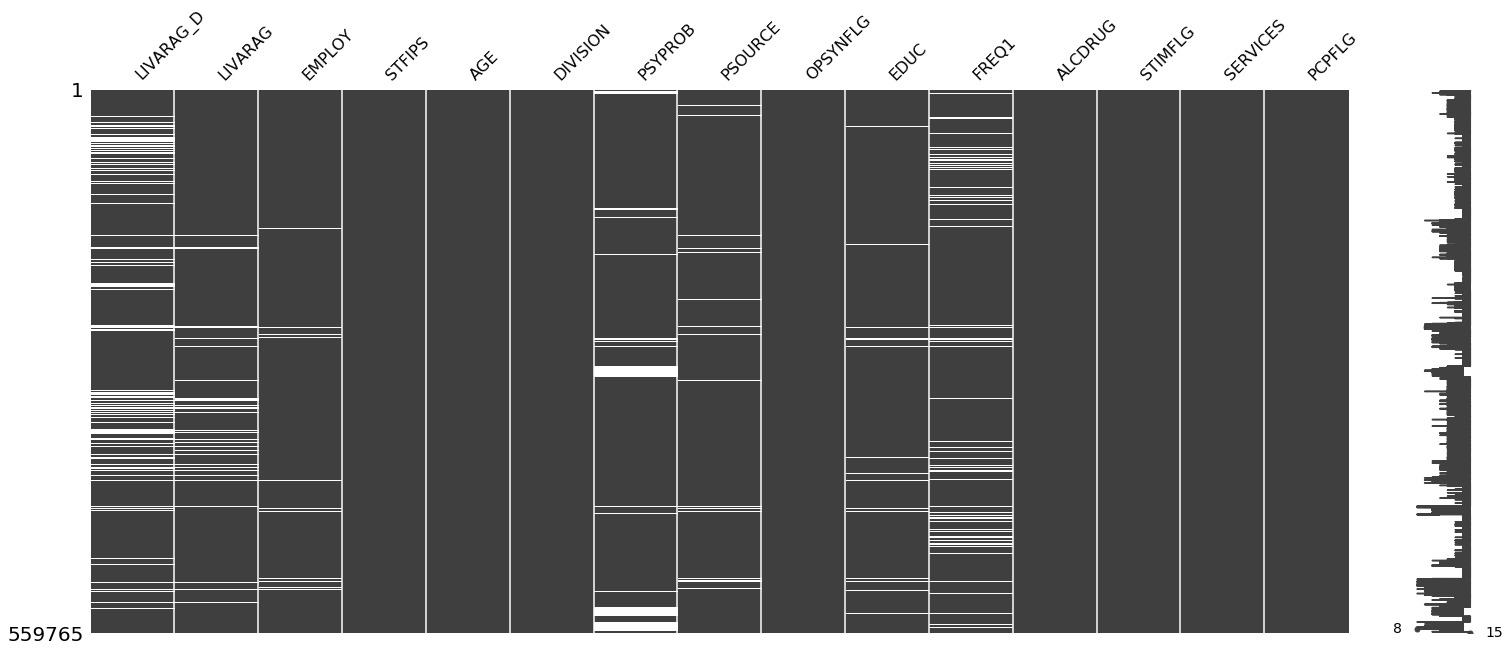

In [0]:
data = data[data['NOPRIOR']==0]
data = data[['LIVARAG_D','LIVARAG', 'EMPLOY', 'STFIPS', 'AGE', 'DIVISION', 'PSYPROB', 'PSOURCE', 'OPSYNFLG', 'EDUC', 'FREQ1', 'ALCDRUG', 'STIMFLG', 'SERVICES', 'PCPFLG']]
data = data.replace({-9:np.nan})

#data = data.dropna()
msno.matrix(data)

In [0]:
data = data.astype(str)
data1 = data[['LIVARAG_D', 'LIVARAG', 'EMPLOY', 'STFIPS', 'AGE', 'DIVISION', 'ALCDRUG', 'PSYPROB', 'PSOURCE', 'EDUC', 'FREQ1', 'SERVICES']]
data2 = data[['PCPFLG', 'OPSYNFLG', 'STIMFLG']]
data1 = pd.get_dummies(data1)

print(data1.columns)
data1 = data1.astype(str)

dataset = pd.concat([data2, data1], axis=1)

Index(['LIVARAG_D_1.0', 'LIVARAG_D_2.0', 'LIVARAG_D_3.0', 'LIVARAG_D_nan',
       'LIVARAG_1.0', 'LIVARAG_2.0', 'LIVARAG_3.0', 'LIVARAG_nan',
       'EMPLOY_1.0', 'EMPLOY_2.0',
       ...
       'FREQ1_3.0', 'FREQ1_nan', 'SERVICES_1.0', 'SERVICES_2.0',
       'SERVICES_3.0', 'SERVICES_4.0', 'SERVICES_5.0', 'SERVICES_6.0',
       'SERVICES_7.0', 'SERVICES_8.0'],
      dtype='object', length=114)


In [0]:
y = dataset['LIVARAG_D_1.0']
feature_names = [i for i in dataset.columns]
X = dataset[feature_names]
X = X.drop(columns=['LIVARAG_D_1.0','LIVARAG_D_2.0' ,'LIVARAG_D_3.0', 'LIVARAG_D_nan'])

In [0]:
X

,PCPFLG,OPSYNFLG,STIMFLG,LIVARAG_1.0,LIVARAG_2.0,LIVARAG_3.0,LIVARAG_nan,EMPLOY_1.0,EMPLOY_2.0,EMPLOY_3.0,EMPLOY_4.0,EMPLOY_nan,STFIPS_1.0,STFIPS_10.0,STFIPS_11.0,STFIPS_12.0,STFIPS_15.0,STFIPS_16.0,STFIPS_17.0,STFIPS_19.0,STFIPS_2.0,STFIPS_20.0,STFIPS_21.0,STFIPS_22.0,STFIPS_23.0,STFIPS_24.0,STFIPS_25.0,STFIPS_26.0,STFIPS_27.0,STFIPS_28.0,STFIPS_29.0,STFIPS_30.0,STFIPS_31.0,STFIPS_32.0,STFIPS_33.0,STFIPS_34.0,STFIPS_35.0,STFIPS_36.0,STFIPS_37.0,STFIPS_38.0,...,DIVISION_3.0,DIVISION_4.0,DIVISION_5.0,DIVISION_6.0,DIVISION_7.0,DIVISION_8.0,DIVISION_9.0,ALCDRUG_0.0,ALCDRUG_1.0,ALCDRUG_2.0,ALCDRUG_3.0,PSYPROB_1.0,PSYPROB_2.0,PSYPROB_nan,PSOURCE_1.0,PSOURCE_2.0,PSOURCE_3.0,PSOURCE_4.0,PSOURCE_5.0,PSOURCE_6.0,PSOURCE_7.0,PSOURCE_nan,EDUC_1.0,EDUC_2.0,EDUC_3.0,EDUC_4.0,EDUC_5.0,EDUC_nan,FREQ1_1.0,FREQ1_2.0,FREQ1_3.0,FREQ1_nan,SERVICES_1.0,SERVICES_2.0,SERVICES_3.0,SERVICES_4.0,SERVICES_5.0,SERVICES_6.0,SERVICES_7.0,SERVICES_8.0
3,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
5,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661202,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1661203,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1661204,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1661205,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [0]:
random_forest = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9583757614734623
